# Visualization of Prior Distributions

The selection of appropriate prior distributions is an integral part of any Bayesian regression. By visualizing prior distributions commonly used in the NGMM development, This notebook is intended the modeler with the selection of an appropriate distribution family and parameter values for the different components of a non-ergodic ground motion model (NGMM). Furthermore, commonly used kernel functions are also presented as they act as prior distributions for the spatially varying terms.

The presented distributions are separated into five main cagories: 
 * prior distributions for fixed and random effects, 
 * prior distributions for scales and standard deviations,
 * prior distributions for precisions, 
 * prior distributions for correlation lenghts, and
 * kernel functions for spatially varying terms. 

This script was developed as part of the Non-ergodic Methodology and Modeling Tools research project summarized in the report by Lavrentiadis G., Kuehn N., Bozorgnia Y., Seylabi E., Meng X., Goulet C., and Kottke A. (2022), "Non‐ergodic Methodology and Modeling Tools (Report GIRS-2022-04)." Natural Hazards Risk and Resiliency Research Center, University of California, Los Angeles.

Support provided by the California Department of Transportation (Caltrans) and Pacific Gas and Electric Company (PG&E) is gratefully acknowledged. 

In [1]:
## Load packages
#general
import os
import sys
import pathlib
#arithmetic libraries
import numpy as np
from scipy import stats
#statistics libraries
import pandas as pd
#plot libraries
%matplotlib widget
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
#jupyter widgets
import ipywidgets as widgets

In [2]:
#user functions
def calc_percentile_lims(tot_prc):
    '''Compute upper and lower percentile limits'''
    lprc = (1-tot_prc)/2
    uprc = 1-lprc
    return (lprc, uprc)

#plot single prior distribution
def plot_prior(dist_nane, x_pdf,y_pdf, x_prc, y_prc,
                          x_lim=[-10,10], y_lim=[0,2],
                          x_user=np.nan,
                          x_name='x'):
    '''Plot prior distributions, percentile range, and user values'''
    
    #create figure
    fig, ax = plt.subplots(figsize = (6,6))   
    ax.plot(x_pdf,y_pdf, color='black', linewidth=2, label=dist_nane)
    ax.fill_between(x_prc, 0, y_prc, label='Percentile Interval')
    if not np.isnan(x_user).all():
        ax.vlines(x_user,0,y_lim[1], linestyle='--', linewidth=2.5, 
                  color='red', label='User value')
    #edit figure
    ax.set_xlabel(x_name, fontsize=15)
    ax.set_ylabel('pdf',  fontsize=15)
    ax.grid(which='both')
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.legend(loc='upper left', fontsize=15)
    #plot limits
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    fig.tight_layout()   

    
#plot two related prior distributions
def plot_prior2(dist1_nane, dist2_nane,
                x1_pdf, y1_pdf, x1_prc, y1_prc,
                x2_pdf, y2_pdf, x2_prc, y2_prc,
                x1_lim=[-10,10], y1_lim=[0,2],
                x2_lim=[-10,10], y2_lim=[0,2],
                x2_user=np.nan,
                x1_user=np.nan,
                x1_name='x1', x2_name='x2'):
    '''Plot prior distributions, percentile range, and user values'''
    
    #create figure
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,6))   
    #first subfigure
    ax[0].plot(x1_pdf,y1_pdf, color='black', linewidth=2, label=dist1_nane)
    ax[0].fill_between(x1_prc, 0, y1_prc, label='Percentile Interval')
    if not np.isnan(x1_user).all():
        ax[0].vlines(x1_user,0,y1_lim[1], linestyle='--', linewidth=2.5, 
                     color='red', label='User value')
    #edit figure
    ax[0].set_xlabel(x1_name, fontsize=15)
    ax[0].set_ylabel('pdf',   fontsize=15)
    ax[0].grid(which='both')
    ax[0].tick_params(axis='x', labelsize=12)
    ax[0].tick_params(axis='y', labelsize=12)
    ax[0].legend(loc='upper left',  fontsize=15)
    #plot limits
    ax[0].set_xlim(x1_lim)
    ax[0].set_ylim(y1_lim)
    #second subfigure
    ax[1].plot(x2_pdf,y2_pdf, color='black', linewidth=2, label=dist2_nane)
    ax[1].fill_between(x2_prc, 0, y2_prc, label='Percentile Interval')
    if not np.isnan(x2_user).all():
        ax[1].vlines(x2_user,0,y2_lim[1], linestyle='--', linewidth=2.5, 
                     color='red', label='User value')
    #edit figure
    ax[1].set_xlabel(x2_name, fontsize=15)
    ax[1].set_ylabel('pdf',   fontsize=15)
    ax[1].grid(which='both')
    ax[1].tick_params(axis='x', labelsize=12)
    ax[1].tick_params(axis='y', labelsize=12)
    ax[1].legend(loc='upper left',  fontsize=15)
    #plot limits
    ax[1].set_xlim(x2_lim)
    ax[1].set_ylim(y2_lim)
    fig.tight_layout()   


#plot kernel function
def plot_kernel(kern_nane, x_pdf, y_pdf, z_pdf, 
                           x_lim=[-100,100], y_lim=[-100,100], z_lim=[0,2],
                           x_name='X', y_name='Y'):
    '''Plot prior distributions, percentile range, and user values'''
    
    #create figure
    fig = plt.figure(figsize = (6,6))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x_pdf, y_pdf, z_pdf, cmap=cm.coolwarm)
    #edit figure
    ax.set_xlabel(x_name, fontsize=15)
    ax.set_ylabel(y_name, fontsize=15)
    ax.set_zlabel('pdf',  fontsize=15)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='z', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    #plot limits
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    fig.tight_layout()   

In [3]:
#distribution percentile
slide_prc = widgets.IntSlider(min=1, max=99, value=95, step=1, layout=widgets.Layout(width='400px'), 
                                description='prcntl (%)')
#user input
text_usr = widgets.BoundedFloatText(value=np.nan, description='user value:', layout=widgets.Layout(width='200px'))

## Prior distributions for fixed and random effects

### Normal distribution
A normal distribution is often used as a prior for the fixed effects, like the model incercept ($c_0$), and the random effects, like the between event residuals ($\delta B$). \
The probability density function of a normal distribution is given by:
$$
f(x|\mu,\sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2}
$$
where the distribution parameters are the mean ($\mu$) and  standard deviation ($\sigma$) which control the location the width of the distribution, respectively.
The mean is defined on the entire the real line ($\mu \in (-\infty,+\infty)$) while the standard deviation is defined on the positive side ($\sigma > 0$).
The support of the normal distribution is $x \in (-\infty,+\infty)$.

interactive(children=(FloatSlider(value=0.0, description='mu', layout=Layout(width='400px'), max=5.0, min=-5.0…

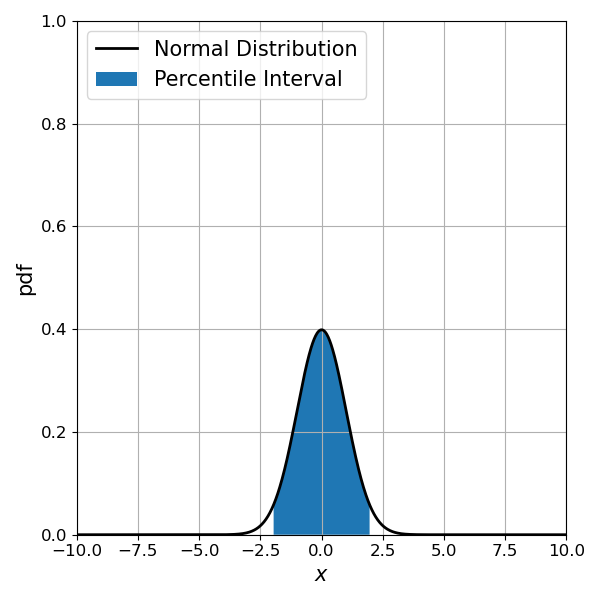

In [4]:
#distribution parameters
slide_mu  = widgets.FloatSlider(min=-5, max=5,  value=0, step=0.05, layout=widgets.Layout(width='400px'), 
                                description='mu')
slide_sig = widgets.FloatSlider(min=0,  max=10, value=1, step=0.05, layout=widgets.Layout(width='400px'), 
                                description='sigma')

#widget for normal distribution
@widgets.interact(mu=slide_mu,sigma=slide_sig,prc=slide_prc,usr=text_usr )
def normal_prior(mu=0,sigma=1,prc=0.95,usr=1):
    #percentile decimal
    prc = prc/100
    #pdf
    x = np.linspace(-10,10,1000)
    y = stats.norm.pdf(x,mu,sigma)
    #selected percentile range
    x_int = stats.norm.interval(prc,mu,sigma)
    x_prc = np.linspace(x_int[0],x_int[1],1000)
    y_prc = stats.norm.pdf(x_prc,mu,sigma)
    #plot distribution
    plot_prior('Normal Distribution',x,y,x_prc,y_prc,
               [-10,10],[0,1],usr,x_name=r'$x$')
    

## Prior distributions for scales and standard deviations
The following prior distributions are often used in the modeling standard deviations, such as $\phi_0$ and $\tau_0$, and the scales of kernel functions, such as $\omega_{1,E}$. The suport of all the following distributions is the positive side of the real line ($x \in (0,-\infty)$)

### Lognormal distribution
The probability density function of a log-normal distribution is:
$$
f(\sigma|\mu_L,\sigma_L) = \frac{1}{\sigma ~\sigma_L \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{\ln(\sigma)-\mu_L}{\sigma_L}\right)^2}
$$
Similar to the normal distribution the mean ($\mu_L$) primarily controls the location, and standard deviation ($\sigma_L$) controls the width of the distribution. 
The distribution parameters are defined in: $\mu_L \in (-\infty,-\infty)$ and $\sigma_L > 0$

interactive(children=(FloatSlider(value=0.0, description='mu_L', layout=Layout(width='400px'), max=5.0, min=-5…

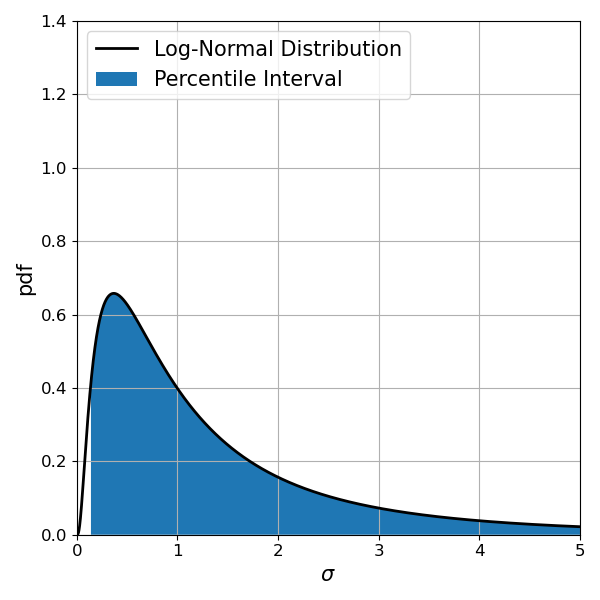

In [5]:
#distribution parameters
slide_mu  = widgets.FloatSlider(min=-5, max=5,  value=0, step=0.05, layout=widgets.Layout(width='400px'), 
                                description='mu_L')
slide_sig = widgets.FloatSlider(min=0,  max=10, value=1, step=0.05, layout=widgets.Layout(width='400px'), 
                                description='sigma_L')

#widget for log-normal distribution
@widgets.interact(mu=slide_mu,sigma=slide_sig,prc=slide_prc,usr=text_usr )
def lognormal_prior(mu=0,sigma=1,prc=0.95,usr=1):
    #percentile decimal
    prc = prc/100
    #covert to arithmetic scale
    mu = np.exp(mu)
    #pdf
    x = np.linspace(0.001,5,10000)
    y = stats.lognorm.pdf(x,scale=mu,s=sigma)
    #selected percentile range
    x_int = stats.lognorm.interval(prc,scale=mu,s=sigma)
    x_prc = np.linspace(x_int[0],x_int[1],1000)
    y_prc = stats.lognorm.pdf(x_prc,scale=mu,s=sigma)
    #plot distribution
    plot_prior('Log-Normal Distribution',x,y,x_prc,y_prc,
               [0,5],[0,1.4],usr,x_name=r'$\sigma$')

### Exponential distribution
The exponential distribution can be used as prior for $\sigma$ in order to penalize unnecessary complexity. This is achived by modeling the random terms with a normal prior distribution with the standard deviation ($\sigma$) being assigned an exponential prior distribution. 
In this case, as most of the mass of the exponential distribution is close to zero, the random terms are allowed to cover a wide range corresponding to large values of $\sigma$ only if there is significant evidence in the data. 

The probability density function of an exponential distribution is given by:
$$
f(\sigma|\lambda) = \lambda e^{-\lambda \sigma}
$$
The rate ($\lambda$) must be a positive number ($\lambda > 0$).

interactive(children=(FloatSlider(value=1.0, description='lambda', layout=Layout(width='400px'), max=5.0, min=…

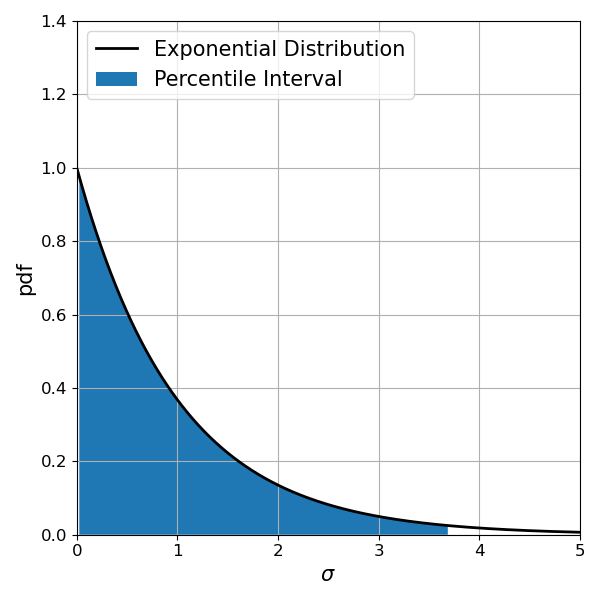

In [6]:
#distribution parameters
slide_lambda  = widgets.FloatSlider(min=0.05, max=5,  value=1, step=0.05, layout=widgets.Layout(width='400px'), 
                                    description='lambda')

#widget for exponential distribution
@widgets.interact(rate=slide_lambda,prc=slide_prc,usr=text_usr )
def expon_prior(rate=1,prc=0.95,usr=1):
    #percentile decimal
    prc = prc/100
    #pdf
    x = np.linspace(0.001,20,10000)
    y = stats.expon.pdf(x,scale=1/rate)
    #selected percentile range
    x_int = stats.expon.interval(prc,scale=1/rate)
    x_prc = np.linspace(x_int[0],x_int[1],1000)
    y_prc = stats.expon.pdf(x_prc,scale=1/rate)
    #plot distribution
    plot_prior('Exponential Distribution',x,y,x_prc,y_prc,
               [0,5],[0,1.4],usr,x_name=r'$\sigma$')

## Prior distributions for precisions

The precision ($\tau$) is defined as the reciprocal of the variance ($\tau = 1/\sigma^2$). Depending on the software and implementation, some Gaussian Process kernel functions are defined in terms of $\tau$. This is often done when the inverse of the covariance matrix is sparse.  

### Gamma distribution

A Gamma prior distribution for the precision corresponds to an inverse-Gamma prior distribution for the variance, which is a conjugate prior, meaning that, for a normally distributed random term, the posterior distribution of the variance will also follow an inverse-Gamma distribution. 

The probability density function of a Gamma distribution is given by:
$$
f(x|\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{\left(-\beta x\right)} 
$$
It is defined in terms the shape ($\alpha$) and rate ($\beta$) parameters, both of which should be positive. 
The support of the Gamma distribution is the positive side of the real line ($x > 0$).

interactive(children=(FloatSlider(value=5.0, description='alpha', layout=Layout(width='400px'), max=20.0, min=…

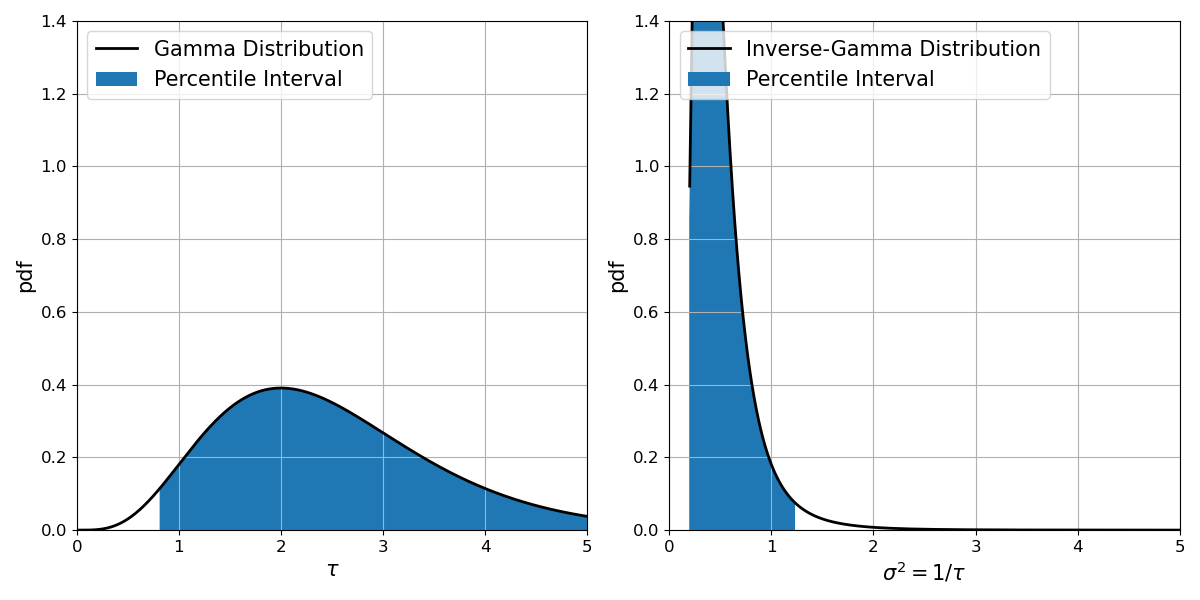

In [7]:
#distribution parameters
slide_alpha = widgets.FloatSlider(min=0.05, max=20, value=5,   step=0.05, layout=widgets.Layout(width='400px'), 
                                  description='alpha')
slide_beta  = widgets.FloatSlider(min=0.05, max=5,  value=0.5, step=0.05, layout=widgets.Layout(width='400px'), 
                                  description='beta')

#widget for inverse gamma distribution
@widgets.interact(alpha=slide_alpha,beta=slide_beta,prc=slide_prc,usr=text_usr )
def gamma_prior(alpha=5,beta=0.5,prc=0.95,usr=1):
    #inverse gamma
    #percentile decimal
    prc = prc/100
    #pdf
    x1 = np.linspace(0.001,5,10000)
    y1 = stats.gamma.pdf(x1,a=alpha,scale=beta)
    #selected percentile range
    x1_int = stats.gamma.interval(prc,a=alpha,scale=beta)
    x1_prc = np.linspace(x1_int[0],x1_int[1],1000)
    y1_prc = stats.gamma.pdf(x1_prc,a=alpha,scale=beta)
    #gamma
    #pdf
    x2 = 1/x1
    y2 = stats.invgamma.pdf(x2,a=alpha,scale=1/beta)
    #selected percentile range
    x2_int = stats.invgamma.interval(prc,a=alpha,scale=1/beta)
    x2_prc = np.linspace(x2_int[0],x2_int[1],1000)
    y2_prc = stats.invgamma.pdf(x2_prc,a=alpha,scale=1/beta)
    #plot distribution
    plot_prior2('Gamma Distribution','Inverse-Gamma Distribution',
                x1,y1,x1_prc,y1_prc,
                x2,y2,x2_prc,y2_prc,
                [0,5],[0,1.4],
                [0,5],[0,1.4],
                usr,1/usr,
                r'$\tau$',r'$\sigma^2=1/\tau$')
    

## Prior distributions for correlation lengths

Correlation length prior distributions are can used to specify a typical range correlation lengths based on previous studies and intuition.
The support of the distributions in this section is the positive real numbers.


### Inverse Gamma distribution

The probability density function of an inverse Gamma distribution is:

$$
f(x|\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{-\alpha-1} e^{\left(-\frac{\beta}{x}\right)} 
$$

The shape ($\alpha$) and rate ($\beta$) parameters should be positive. 

interactive(children=(FloatSlider(value=2.0, description='alpha', layout=Layout(width='400px'), max=4.0, min=0…

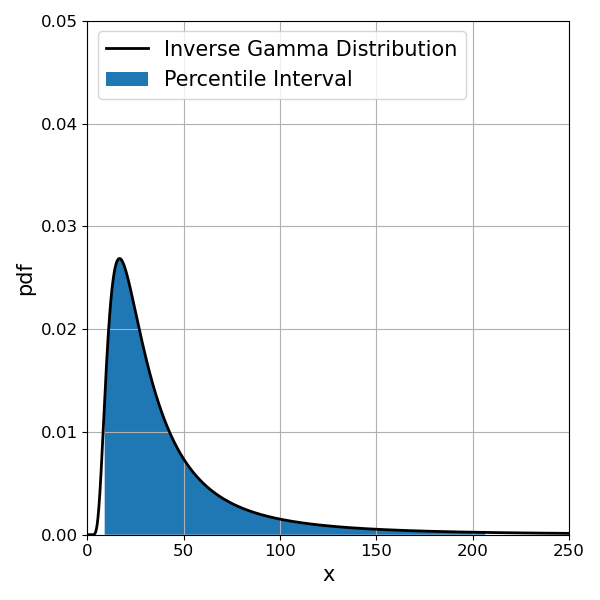

In [8]:
#distribution parameters
slide_alpha = widgets.FloatSlider(min=0.05, max=4,   value=2, step=0.05, layout=widgets.Layout(width='400px'), 
                                  description='alpha')
slide_beta  = widgets.FloatSlider(min=0.05, max=100, value=50, step=0.05, layout=widgets.Layout(width='400px'), 
                                  description='beta')

#widget for inverse gamma distribution
@widgets.interact(alpha=slide_alpha,beta=slide_beta,prc=slide_prc,usr=text_usr )
def invgamma_prior(alpha=2,beta=50,prc=0.95,usr=1):
    #percentile decimal
    prc = prc/100
    #pdf
    x = np.linspace(0.001,250,10000)
    y = stats.invgamma.pdf(x,a=alpha,scale=beta)
    #selected percentile range
    x_int = stats.invgamma.interval(prc,a=alpha,scale=beta)
    x_prc = np.linspace(x_int[0],x_int[1],1000)
    y_prc = stats.invgamma.pdf(x_prc,a=alpha,scale=beta)
    #plot distribution
    plot_prior('Inverse Gamma Distribution',x,y,x_prc,y_prc,
               [0,250],[0,0.05],usr)

## Kernel Functions

The role of the kernel function in a Gaussian Process regression is to specify the correlation structure of the model terms. In non-ergodic ground motion models, the correlation structure refers to the spatial correlation of the varying coefficients. The selection of the kernel function controls the smoothness and continuity of the spatial variability of model coefficients. 


In [9]:

from matplotlib import cm
from sklearn.gaussian_process.kernels import Matern 


#kernel functions
ExpKernel    = lambda omega, ell,     dist: omega**2 * np.exp(-dist/ell)
SqExpKernel  = lambda omega, ell,     dist: omega**2 * np.exp(-dist**2/ell**2)
MaternKernel = lambda omega, ell, nu, dist: omega**2 * Matern(nu=nu, length_scale=ell)(0, dist.ravel()[:, np.newaxis]).reshape(dist.shape)


### Exponential Kernel Function

The exponential kernel function results in a continuous but non-smooth spatial variability. It is defined as:

$$
\kappa(\vec{t},\vec{t}') = \omega^2 \exp \left( - \frac{||\vec{t}-\vec{t}'||}{\ell} \right)
$$

$\kappa(\vec{t},\vec{t}')$ is the covarinace between the $\vec{t}$ and $\vec{t}'$ pairs of coordinates. The scale $\omega$ controls the size of the variability, and the correlation lenght $\ell$ controls the lenght scale of the spatial variation. Both $\omega$ and $\ell$ must be positive.


interactive(children=(FloatSlider(value=0.3, description='omega', layout=Layout(width='400px'), max=2.0, min=0…

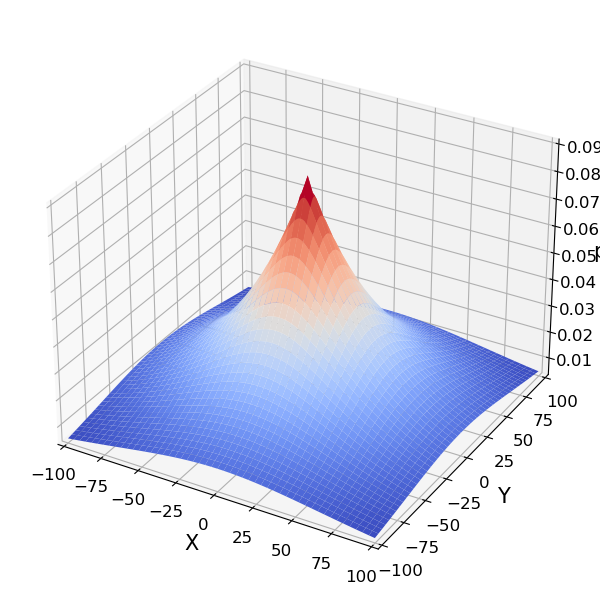

In [10]:
#distribution parameters
slide_omega = widgets.FloatSlider(min=0.01, max=2,   value=0.3, step=0.05, layout=widgets.Layout(width='400px'), 
                                  description=f'omega')
slide_ell   = widgets.FloatSlider(min=1, max=100, value=50, step=1, layout=widgets.Layout(width='400px'), 
                                  description='ell')

#widget for inverse gamma distribution
@widgets.interact(omega=slide_omega,ell=slide_ell)
def exp_kernel(omega=2,ell=50):
    #pdf
    X = np.arange(-100, 100, 0.25)
    Y = np.arange(-100, 100, 0.25)
    X, Y = np.meshgrid(X, Y)
    dist = np.sqrt(X**2 + Y**2)
    Z = ExpKernel(omega, ell, dist)
    plot_kernel('Exponential', X, Y, Z) 

### Squared-Exponential Kernel Function

The squared-exponential kernel function results in a continuous and smooth (infinitely differentiable) spatial variability. It is defined as:

$$
\kappa(\vec{t},\vec{t}') = \omega^2 \exp \left( - \frac{||\vec{t}-\vec{t}'||^2}{\ell^2} \right)
$$

Similary to the exponential kernel function, the scale ($\omega$) and correlation lenght ($\ell$) control the size and length scale of the variability.

interactive(children=(FloatSlider(value=0.3, description='omega', layout=Layout(width='400px'), max=2.0, min=0…

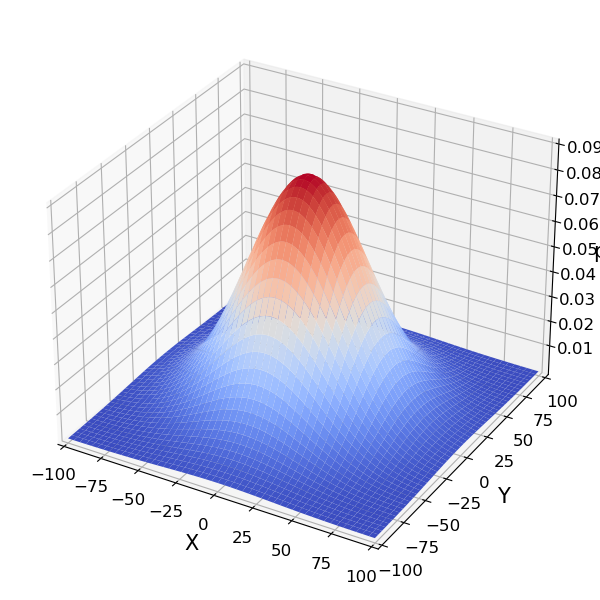

In [11]:
#distribution parameters
slide_omega = widgets.FloatSlider(min=0.01, max=2,   value=0.3, step=0.05, layout=widgets.Layout(width='400px'), 
                                  description=f'omega')
slide_ell   = widgets.FloatSlider(min=1, max=100, value=50, step=1, layout=widgets.Layout(width='400px'), 
                                  description='ell')

#widget for inverse gamma distribution
@widgets.interact(omega=slide_omega,ell=slide_ell)
def sqexp_kernel(omega=2,ell=50):
    #pdf
    X = np.arange(-100, 100, 0.25)
    Y = np.arange(-100, 100, 0.25)
    X, Y = np.meshgrid(X, Y)
    dist = np.sqrt(X**2 + Y**2)
    Z = SqExpKernel(omega, ell, dist)
    plot_kernel('Squared Exponential', X, Y, Z) 

### Matern Kernel Function

The Matern kernel function is a generalization of the exponential and squared exponential cases. It is defined as:

$$
\kappa(\vec{t},\vec{t}') = \frac{ \omega^2 }{ 2^{\nu-1} \Gamma(\nu) } \left( \frac{ \sqrt{2 \nu}}{\ell} ||\vec{t}-\vec{t}'|| \right)^\nu  
K \left( \frac{ \sqrt{2 \nu}}{\ell} ||\vec{t}-\vec{t}'|| \right) 
$$

$\Gamma(...)$ is a Gamma function, and $K(...)$ is a modifed Bessel function. 
$\nu$ controls the smoothness of the spatial variability; when it approaches zero ($\nu \rightarrow 0^+$), the Matern kernel function converges to an exponential kernel function, while when it approaches infinity ($\nu \rightarrow +\infty$), the Matern kernel function converges to a squared exponential kernel function. 
The scale ($\omega$) and correlation length ($\ell$) control the size and length scale of the variability.

interactive(children=(FloatSlider(value=0.3, description='omega', layout=Layout(width='400px'), max=2.0, min=0…

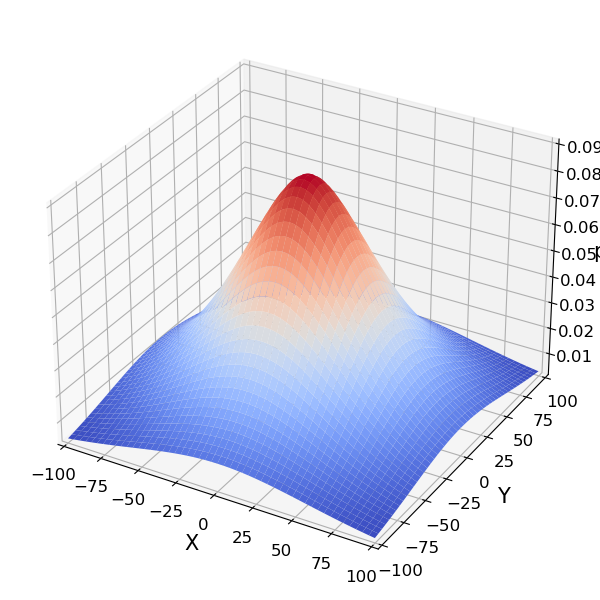

In [12]:
#distribution parameters
slide_omega = widgets.FloatSlider(min=0.01, max=2,   value=0.3, step=0.05, layout=widgets.Layout(width='400px'), 
                                  description=f'omega')
slide_ell   = widgets.FloatSlider(min=1, max=100, value=50, step=1, layout=widgets.Layout(width='400px'), 
                                  description='ell')
slide_nu    = widgets.FloatSlider(min=0.5, max=5, value=2, step=0.1, layout=widgets.Layout(width='400px'), 
                                  description='nu')

#widget for inverse gamma distribution
@widgets.interact(omega=slide_omega,ell=slide_ell,nu=slide_nu)
def matern_kernel(omega=2,ell=50, nu=2.5):
    #pdf
    X = np.arange(-100, 100, 0.25)
    Y = np.arange(-100, 100, 0.25)
    X, Y = np.meshgrid(X, Y)
    dist = np.sqrt(X**2 + Y**2)
    Z = MaternKernel(omega, ell, nu, dist)
    plot_kernel('Matern', X, Y, Z) 